# Import

In [1]:
import boto3
import pyspark

In [27]:
# get region
region = boto3.session.Session().region_name
# get bucket: hang's project 8 of openclassrooms
bucket_name = 'hangp8'
img_sample_dir = 's3://{}/train_sample/'.format(bucket_name)
img_sample_output = 's3://{}/output_sample/'.format(bucket_name)

## setup of SparkSession 
(ref: https://sagemaker-examples.readthedocs.io/en/latest/sagemaker-spark/pyspark_mnist/pyspark_mnist_kmeans.html#Setup)

In [10]:
import os
import boto3

from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

import sagemaker
from sagemaker import get_execution_role
import sagemaker_pyspark


role = get_execution_role()

# Configure Spark to use the SageMaker Spark dependency jars
jars = sagemaker_pyspark.classpath_jars()

classpath = ":".join(sagemaker_pyspark.classpath_jars())

# Sets the Spark master URL to connect to, run locally with all cores available: 'local[*]'
spark = (
    SparkSession.builder.config("spark.driver.extraClassPath", classpath)
    .master("local[*]")
    .getOrCreate()
)

spark

## load image data source
Access your files in S3 without copying files into your instance storage
(ref:https://sagemaker-examples.readthedocs.io/en/latest/ingest_data/013_Ingest_image_data_v1.html?highlight=fs.ls#Method-1:-Streaming-data-from-S3-to-the-SageMaker-instance-memory)

In [59]:
# save img path and labels
def get_path_label_list(prefix='train_sample', bucket_name=bucket_name):
    s3 = boto3.resource('s3')
    bucket=bucket_name
    my_bucket = s3.Bucket(bucket)
    path_label_list = []
    for (bucket_name, key) in map(lambda x: (x.bucket_name, x.key), my_bucket.objects.filter(Prefix=prefix)):
        # save img path
        img_location = "s3://{}/{}".format(bucket_name, key)
        # save img label
        img_label = img_location.split('/')[-2]
        path_label_list.append((img_location, img_label))
    return path_label_list

In [62]:
path_label_list = get_path_label_list()
print('Show 1 line of path: {}\nThere are {} images in train_sample.'.format(path_label_list[0], len(path_label_list)))

Show 1 line of path: ('s3://hangp8/train_sample/Apple Pink Lady/0_100.jpg', 'Apple Pink Lady')
There are 946 images in train_sample.


In [67]:
def create_df(prefix='train_sample', bucket=bucket_name):
    data = get_path_label_list(prefix, bucket)
    columns = ['path', 'label']
    df_data = spark.createDataFrame(data).toDF(*columns)
    return df_data

In [72]:
df_data = load_img()
df_data.show(10, truncate=False)

+----------------------------------------------------+---------------+
|path                                                |label          |
+----------------------------------------------------+---------------+
|s3://hangp8/train_sample/Apple Pink Lady/0_100.jpg  |Apple Pink Lady|
|s3://hangp8/train_sample/Apple Pink Lady/100_100.jpg|Apple Pink Lady|
|s3://hangp8/train_sample/Apple Pink Lady/101_100.jpg|Apple Pink Lady|
|s3://hangp8/train_sample/Apple Pink Lady/102_100.jpg|Apple Pink Lady|
|s3://hangp8/train_sample/Apple Pink Lady/103_100.jpg|Apple Pink Lady|
|s3://hangp8/train_sample/Apple Pink Lady/104_100.jpg|Apple Pink Lady|
|s3://hangp8/train_sample/Apple Pink Lady/105_100.jpg|Apple Pink Lady|
|s3://hangp8/train_sample/Apple Pink Lady/106_100.jpg|Apple Pink Lady|
|s3://hangp8/train_sample/Apple Pink Lady/107_100.jpg|Apple Pink Lady|
|s3://hangp8/train_sample/Apple Pink Lady/108_100.jpg|Apple Pink Lady|
+----------------------------------------------------+---------------+
only s

In [70]:
df_data.printSchema()

root
 |-- path: string (nullable = true)
 |-- label: string (nullable = true)



# Brouillons

## Import of dataframe

In [2]:
import pandas as pd

input_data = "s3://hangtestbucket/test.csv".format(region)
df = pd.read_csv(input_data, nrows=10)
df.head(n=10)

,Unnamed: 0,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,client_installments_AMT_PAYMENT_min_sum,DAYS_BIRTH,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,bureau_DAYS_CREDIT_ENDDATE_max,...,previous_PRODUCT_COMBINATION_Cash Street: high_sum,client_credit_AMT_DRAWINGS_CURRENT_max_min,NAME_FAMILY_STATUS_Civil marriage,client_cash_NAME_CONTRACT_STATUS_Returned to the store_mean_max,client_installments_NUM_INSTALMENT_NUMBER_min_max,previous_CHANNEL_TYPE_Stone_mean,previous_WEEKDAY_APPR_PROCESS_START_THURSDAY_sum,client_bureau_balance_STATUS_C_count_min,client_credit_CNT_DRAWINGS_POS_CURRENT_sum_max,OCCUPATION_TYPE_High skill tech staff
0,0,0.752614,0.789654,0.159520,27746.775,-19241,568800.0,20560.5,-2329,1778.0,...,0.0,NaN,0,0.0,2.0,0.00,0.0,0.0,NaN,0
1,1,0.564990,0.291656,0.432962,43318.800,-18064,222768.0,17370.0,-4469,1324.0,...,0.0,NaN,0,0.0,1.0,0.00,1.0,0.0,NaN,0
2,2,NaN,0.699787,0.610991,66875.266,-20038,663264.0,69777.0,-4458,-567.0,...,0.0,157500.000,0,0.0,1.0,0.25,1.0,0.0,0.0,0
3,3,0.525734,0.509677,0.612704,172044.310,-13976,1575000.0,49018.5,-1866,30885.0,...,0.0,22823.550,0,0.0,1.0,0.00,4.0,0.0,115.0,0
4,4,0.202145,0.425687,NaN,133169.400,-13040,625500.0,32067.0,-2191,NaN,...,0.0,NaN,0,0.0,1.0,0.00,0.0,NaN,NaN,0
5,5,NaN,0.628904,0.392774,1842460.900,-18604,959688.0,34600.5,-12009,8957.0,...,1.0,87750.000,0,0.0,1.0,0.00,2.0,0.0,8.0,0
6,6,0.760851,0.571084,0.651260,68259.330,-16685,499221.0,22117.5,-2580,5813.0,...,0.0,NaN,0,0.0,1.0,0.00,0.0,0.0,NaN,1
7,7,0.565290,0.613033,0.312365,90619.650,-9516,180000.0,14220.0,-1387,27225.0,...,0.0,NaN,0,0.0,1.0,0.50,0.0,0.0,NaN,0
8,8,0.718507,0.808788,0.522697,451534.880,-12744,364896.0,28957.5,-1013,1363.0,...,0.0,0.000,0,0.0,1.0,0.00,0.0,0.0,0.0,0
9,9,0.210562,0.444848,0.194068,272273.840,-10395,45000.0,5337.0,-2625,30886.0,...,1.0,46897.695,1,0.0,1.0,0.00,7.0,0.0,51.0,0


## Import and export image to S3

In [3]:
from PIL import Image, ImageOps, ImageFilter
import cv2 as cv

In [45]:
from PIL import Image
from io import BytesIO
import numpy as np
def read_image_from_s3(path, region_name=region, bucket='hangtestbucket'):
    """Load image file from s3.

    Parameters
    ----------
    bucket: string
        Bucket name
    path : string
        Path in s3

    Returns
    -------
    np array
        Image array
    """
    s3 = boto3.resource('s3', region_name=region_name)
    bucket = s3.Bucket(bucket)
    object = bucket.Object(path)
    response = object.get()
    file_stream = response['Body']
    im = Image.open(file_stream)
    return np.array(im)

def write_image_to_s3(img_array, path, region_name=region, bucket='hangtestbucket'):
    """Write an image array into S3 bucket

    Parameters
    ----------
    bucket: string
        Bucket name
    path : string
        Path in s3

    Returns
    -------
    None
    """
    s3 = boto3.resource('s3', region_name)
    bucket = s3.Bucket(bucket)
    object = bucket.Object(path)
    file_stream = BytesIO()
    im = Image.fromarray(img_array)
    im.save(file_stream, format='jpeg')
    object.put(Body=file_stream.getvalue())

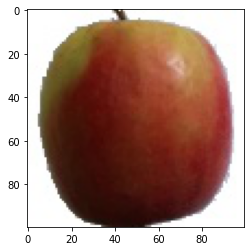

In [42]:
img = read_image_from_s3(path='75_100.jpg')
plt.imshow(img)

In [46]:
write_image_to_s3(img, path='export_test.jpeg')

In [26]:
df = spark.read.format("image").option("dropInvalid", True).load("s3a://hangtestbucket/75_100.jpg")
df.select("image.origin", "image.width", "image.height").show()

+--------------------+-----+------+
|              origin|width|height|
+--------------------+-----+------+
|s3a://hangtestbuc...|  100|   100|
+--------------------+-----+------+

